# DBSCAN

http://madhukaudantha.blogspot.com/2015/04/density-based-clustering-algorithm.html

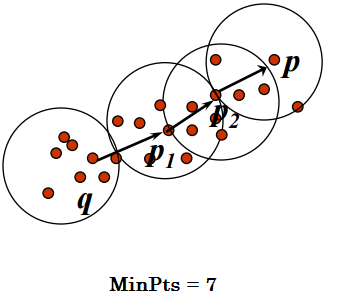

– точка p напрямую достижима из p2

– p2 напрямую достижима из p1

– p1 напрямую достижима из q

– p <- p2 <- p1 <- q из цепочки следует, что:

p достижима (о посредственно) из q, q не достижима из p


## Algorithm

DBSCAN(D, eps, MinPts)<br>
   &emsp;C = 0<br>
   &emsp;for each unvisited point P in dataset D<br>
      &emsp;&emsp;mark P as visited<br>
      &emsp;&emsp;NeighborPts = regionQuery(P, eps)<br>
      &emsp;&emsp;if sizeof(NeighborPts) < MinPts<br>
         &emsp;&emsp;&emsp;mark P as NOISE<br>
      &emsp;&emsp;else<br>
         &emsp;&emsp;&emsp;C = next cluster<br>
         &emsp;&emsp;&emsp;expandCluster(P, NeighborPts, C, eps, MinPts)<br>
         
expandCluster(P, NeighborPts, C, eps, MinPts)<br>
   &emsp;add P to cluster C<br>
   &emsp;for each point P' in NeighborPts<br>
      &emsp;&emsp;if P' is not visited<br>
         &emsp;&emsp;&emsp;mark P' as visited<br>
         &emsp;&emsp;&emsp;NeighborPts' = regionQuery(P', eps)<br>
         &emsp;&emsp;&emsp;if sizeof(NeighborPts') >= MinPts<br>
            &emsp;&emsp;&emsp;&emsp;NeighborPts = NeighborPts joined with NeighborPts'<br>
      &emsp;&emsp;if P' is not yet member of any cluster<br>
         &emsp;&emsp;&emsp;add P' to cluster C<br>
         
regionQuery(P, eps)<br>
   &emsp;return all points within P's eps-neighborhood (including P)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

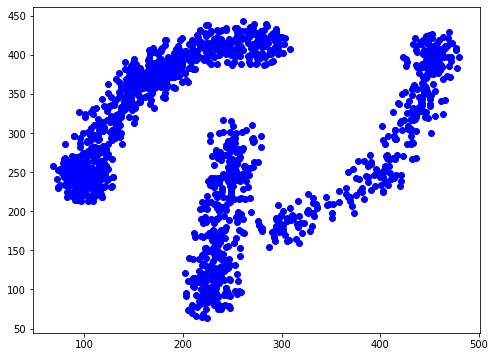

In [6]:
import pygame

points = np.empty((0,2), dtype='f')
    
c_radius = 2
c_color = (0,0,255)
c_thickness = 0 
jet_radius = 30
jet_thr = 0

bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("#5")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing and np.random.uniform(0,1)>jet_thr:        
        (x, y) = pygame.mouse.get_pos()
        r = np.random.uniform(0,jet_radius)
        phi = np.random.uniform(0,2*np.pi)
        coord = [x+r*np.cos(phi), height-y+r*np.sin(phi)]
        points = np.append(points, [coord], axis=0)
            
    screen.fill(bg_color)
    for point in points:
        pygame.draw.circle(screen,c_color,(int(point[0]),height-int(point[1])),c_radius,c_thickness)
    pygame.display.flip()
    
pygame.quit()

fig = plt.figure(figsize=(width/80,height/80))
plt.scatter(points[:,0],points[:,1],c="blue")
plt.show()

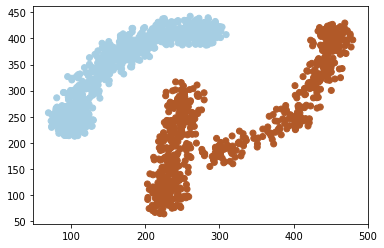

In [11]:
from sklearn.cluster import DBSCAN
labels = DBSCAN(eps=20, min_samples=15).fit_predict(points)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(points[:,0], points[:,1], c=labels, cmap=plt.cm.Paired)
plt.show()

In [23]:
class DB_SCAN():
    
    def __init__(self, dataset, eps=20.0, min_samples=10):
        self.dataset = dataset
        self.eps = eps
        self.min_samples = min_samples
        self.n_clusters = 0
        self.clusters = {0:[]}
        self.visited = set()
        self.clustered = set()
        self.labels = np.array([], dtype='i')
        self.fitted = False
        
    def get_dist(self, list1, list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2)))
    
    def get_neighbours(self, P):
        return [list(Q) for Q in self.dataset if \
               self.get_dist(P,Q)<self.eps]
    
    def expand_cluster(self, P):
        self.n_clusters += 1
        self.clusters[self.n_clusters] = []
        self.clustered.add(tuple(P))
        self.clusters[self.n_clusters].append(P)
        neighbours = self.get_neighbours(P)
        while neighbours:
            Q = neighbours.pop()
            if tuple(Q) not in self.visited:
                self.visited.add(tuple(Q))
                Q_neighbours = self.get_neighbours(Q)
                if len(Q_neighbours)>self.min_samples:
                    neighbours.extend(Q_neighbours)
            if tuple(Q) not in self.clustered:
                self.clustered.add(tuple(Q))
                self.clusters[self.n_clusters].append(Q)
                if Q in self.clusters[0]: # python list required not np.array
                    self.clusters[0].remove(Q)
                    
    def fit(self):
        for P in self.dataset:
            P = list(P)
            if tuple(P) in self.visited:
                continue
            self.visited.add(tuple(P))
            neighbours = self.get_neighbours(P)
            if len(neighbours)<self.min_samples:
                self.clusters[0].append(P)
            else:
                self.expand_cluster(P)
        self.fitted = True
        
    def get_labels(self):
        labels = []
        if not self.fitted:
            self.fit()
        for P in self.dataset:
            for i in range(self.n_clusters+1):
                if list(P) in self.clusters[i]:
                    labels.append(int(i))                    
        self.labels = np.array(labels, dtype='i')
        return self.labels 
    
    
dbscan = DB_SCAN(points, eps=20., min_samples=10)
print(dbscan.labels)
print(dbscan.get_neighbours(dbscan.dataset[39]))

#dbscan.expand_cluster(dbscan.dataset[39])
#print(dbscan.clusters)

dbscan.fit()
# Из-за этой строки были проблемы
#print(dbscan.clusters)

dbscan.get_labels()
print(dbscan.labels)

[]
[[81.7030789598738, 235.7582237184202], [90.4584680883606, 231.709913829784], [90.6682379747461, 214.16244173864845], [85.37383624453688, 242.08853460096964], [91.26091565363228, 241.8698522009621], [100.35789167184622, 231.03937362540051], [73.45686429756594, 229.521512532254], [101.99874793444228, 221.67585546423086], [93.101841474753, 233.36395118748484], [97.79249661861625, 234.94190462384722], [82.42582303377274, 224.50773901808728], [93.89126875609347, 214.11624413700767], [99.08993892858884, 231.6326048354179], [89.04404293550708, 236.66475728837244], [83.59113407809159, 239.21399578501797], [96.50648452040302, 231.73168400086536], [83.81731490081225, 234.41029688645017], [95.08560959811437, 236.19785678898228], [91.78960496661851, 214.24402254639705], [92.55300493705718, 237.61803003161143], [96.78151984173769, 213.5779248502766], [99.68041147126986, 233.97200388932862], [83.95366526068598, 225.0542816974658], [100.16683023131463, 228.9566211282119], [93.79631050180674, 218.

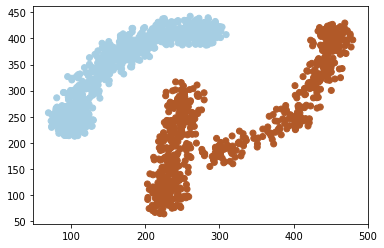

In [25]:
labels = DB_SCAN(points, eps=20., min_samples=10).get_labels()

fig = plt.figure()
plt.scatter(points[:,0], points[:,1], c=labels, cmap=plt.cm.Paired)
plt.show()

In [22]:
l = [2.5, 8.9]
t = tuple(l)
n = np.array(l)
t = tuple(n)
print(t)
s = set()
s.add(t)
s.add(t)
s

(2.5, 8.9)


{(2.5, 8.9)}

https://habr.com/ru/post/322034/

Существуют эвристики для выбора $m$ и $\epsilon$. Чаще всего применяется такой метод и его вариации:

1. Выберите $m$. Обычно используются значения от 3 до 9, чем более неоднородный ожидается датасет, и чем больше уровень шума, тем большим следует взять $m$.

2. Вычислите среднее расстояние по $m$ ближайшим соседям для каждой точки. Т.е. если $m=3$, нужно выбрать трёх ближайших соседей, сложить расстояния до них и поделить на три.

3. Сортируем полученные значения по возрастанию и выводим на экран.

4. Видим что-то вроде такого резко возрастающего графика. Следует взять $\epsilon$ где-нибудь в полосе, где происходит самый сильный перегиб. Чем больше $\epsilon$, тем больше получатся кластеры, и тем меньше их будет.

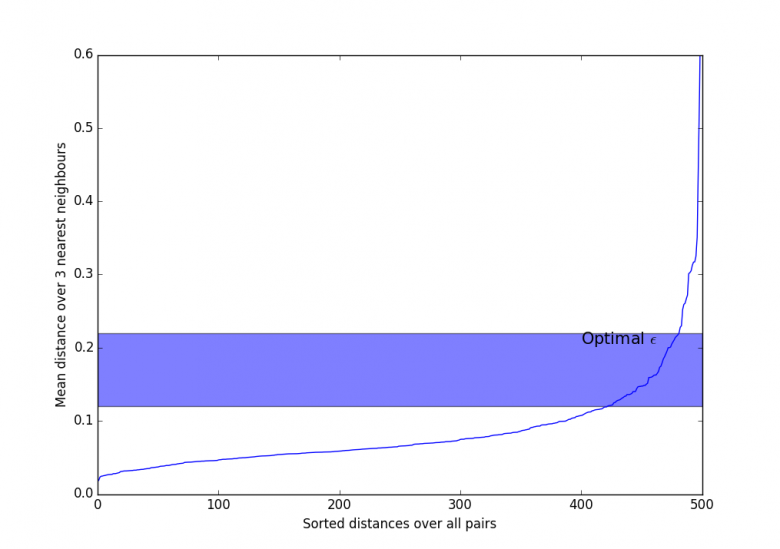